# Coursework – Data Analysis
## Name: Mir Lutfur Rahman
## Student ID: 19067741
## Program: MSc Advanced Computer Science with Placement

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as lia
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

print('Library Loaded')

Library Loaded


## Task 1 (a): Use Pandas to load the data and report the number of data points (rows) in the dataset. 

In [9]:
#Task_1_a
dataset=pd.read_csv("winequality-white.csv",sep=';',decimal='.')
print('Number of Datapoints in the Dataset: ',dataset.shape[0])
D = dataset.iloc[-1001:-1,:]
print(D)

Number of Datapoints in the Dataset:  4898
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3897            7.0              0.24         0.30            12.3      0.035   
3898            8.5              0.23         0.34             1.3      0.035   
3899            6.0              0.21         0.30             8.7      0.036   
3900            7.0              0.34         0.10             3.5      0.044   
3901            4.8              0.65         0.12             1.1      0.013   
...             ...               ...          ...             ...        ...   
4892            6.5              0.23         0.38             1.3      0.032   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1

## Task 1 (b): Consider “quality” as class labels. Report the number of features in the dataset and the number of data points in each class.

In [3]:
#Task_1_b
print('Number of features in the dataset: ',dataset.shape[1])
q_dpoints = dataset.pivot_table(index=['quality'], aggfunc='size')
print('Number of data points in each class: \n', q_dpoints)

Number of features in the dataset:  12
Number of data points in each class: 
 quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


## Task 1 (c): Perform random permutations of the data using the function, shuffle, from sklearn.utils. You must set a value to the parameter, random_state. Assign the data to a new variable as white_wine.

In [4]:
#Task_1_c
white_wine = shuffle(dataset, random_state=2)
print(white_wine)
class_labels=white_wine['quality']

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3732            7.5              0.28         0.41            1.30      0.044   
2981            8.5              0.23         0.28           11.10      0.033   
1247            7.2              0.21         0.34            1.10      0.046   
1835            8.0              0.55         0.42           12.60      0.211   
4432            6.7              0.24         0.26            5.40      0.030   
...             ...               ...          ...             ...        ...   
3335            6.9              0.38         0.29           13.65      0.048   
1099            5.8              0.29         0.21            2.60      0.025   
2514            6.9              0.34         0.30            4.70      0.029   
3606            6.4              0.38         0.24            7.20      0.047   
2575            6.7              0.17         0.42           10.40      0.038   

      free sulfur dioxide  

## Task 1 (d): Produce one scatter plot, that is, one feature against another feature. You are free to choose which two features you want to use.

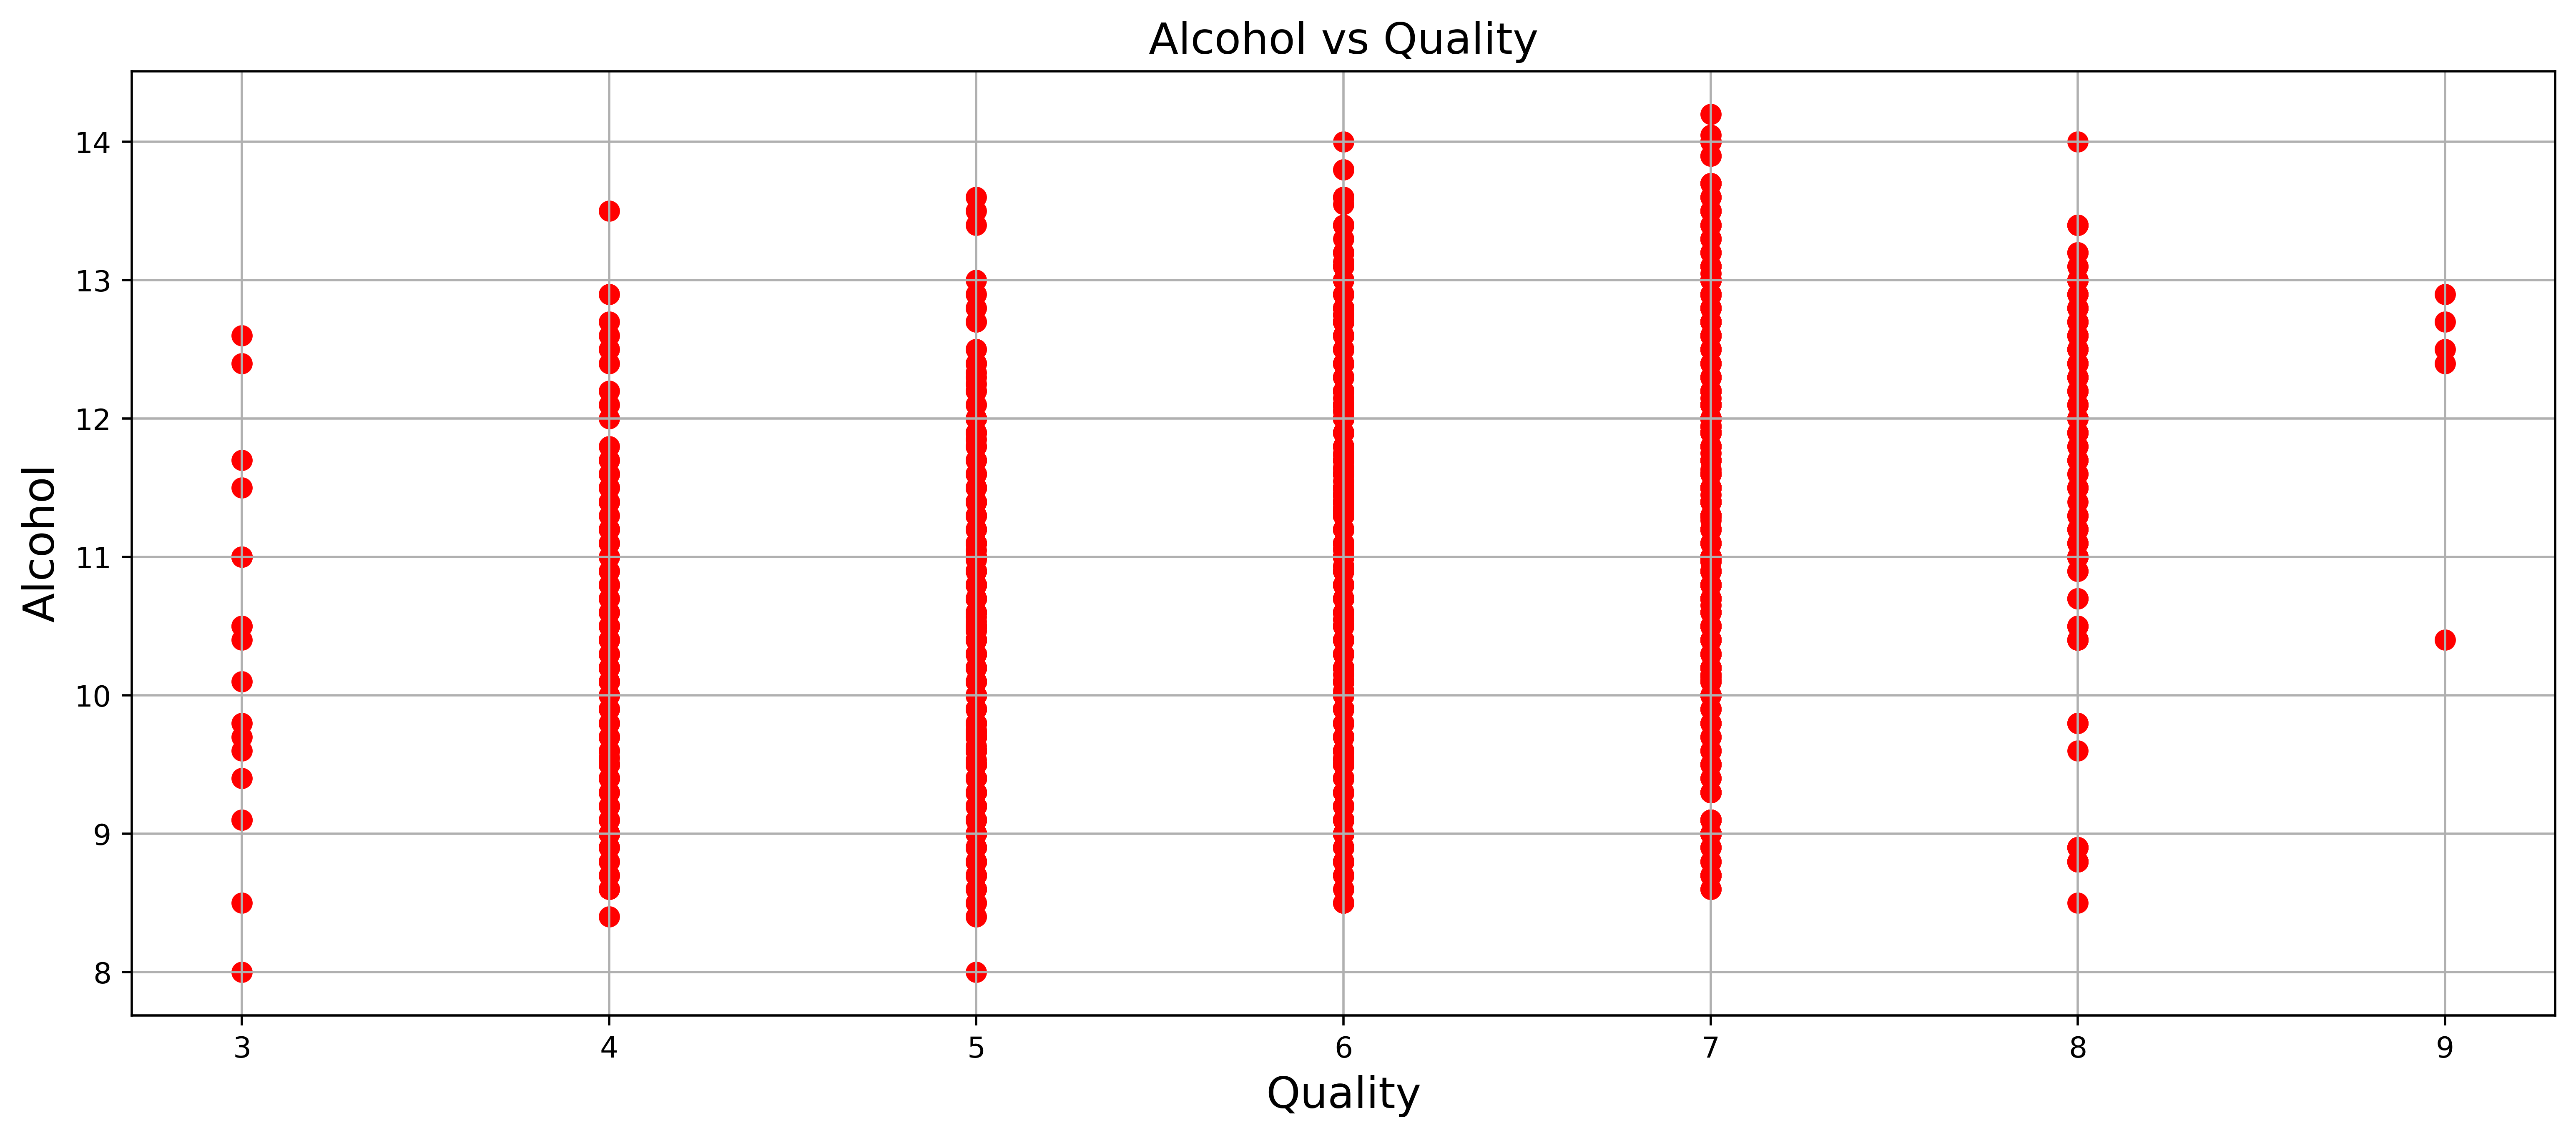

In [5]:
#Task_1_d
x=np.array(dataset['quality'])
y=np.array(dataset['alcohol'])
plt.figure(figsize=(15,6),dpi=500)
plt.title('Alcohol vs Quality',fontsize=15)
plt.xlabel('Quality',fontsize=15)
plt.ylabel('Alcohol',fontsize=15)
plt.scatter(x,y,marker='o',color='red',s=40)
plt.grid()

## Task 2 (a): Perform a PCA analysis on the whole white_wine dataset.

In [6]:
#Task_2_a
#Mean Removal
white_wine=preprocessing.scale(white_wine)
print("Mean: \n'",white_wine.mean(axis=0))

#PCA Analysis
pca=PCA(n_components=white_wine.shape[1])
#Projection
proj=pca.fit_transform(white_wine)

print('\n\nProjection: \n',proj)
print('\n\nPrincipal Components: \n',pca.components_)

Mean: 
' [-3.51064398e-16 -1.11339639e-16  1.95841710e-17 -1.04448912e-16
  3.36557605e-16 -1.59574726e-17 -4.93230972e-17 -4.16888972e-14
 -1.19100773e-15  1.49419971e-16 -3.72824588e-16  3.08269358e-17]


Projection: 
 [[-0.70028592 -1.10986482  0.69261309 ... -0.33642081  0.28307622
  -0.0987226 ]
 [ 0.01775872 -1.89151012 -0.87312695 ...  0.25448149 -0.50102418
  -0.27309305]
 [-1.80357007 -0.82306897 -0.04683503 ...  0.38250922 -0.3376804
   0.16918687]
 ...
 [-1.72605584  0.88417553 -0.51894117 ...  0.08777447  0.28451858
  -0.07888414]
 [ 1.2568822   0.54295238  1.2752249  ... -0.35210708 -0.46251267
   0.15995356]
 [ 2.52686009  0.63851716 -1.79105502 ... -0.12540096 -0.94178747
  -0.01800357]]


Principal Components: 
 [[ 0.15690447  0.02428722  0.1329443   0.40605288  0.217544    0.27471931
   0.39044148  0.50129557 -0.13003701  0.03364168 -0.44279498 -0.22713722]
 [-0.56066866 -0.01606694 -0.28938115  0.03882402 -0.03691144  0.34554881
   0.27232605  0.01773344  0.56714503  

## Task 2 (b): Plot the data in the PC1 and PC2 projections and label/colour the data in the plot according to their class labels.

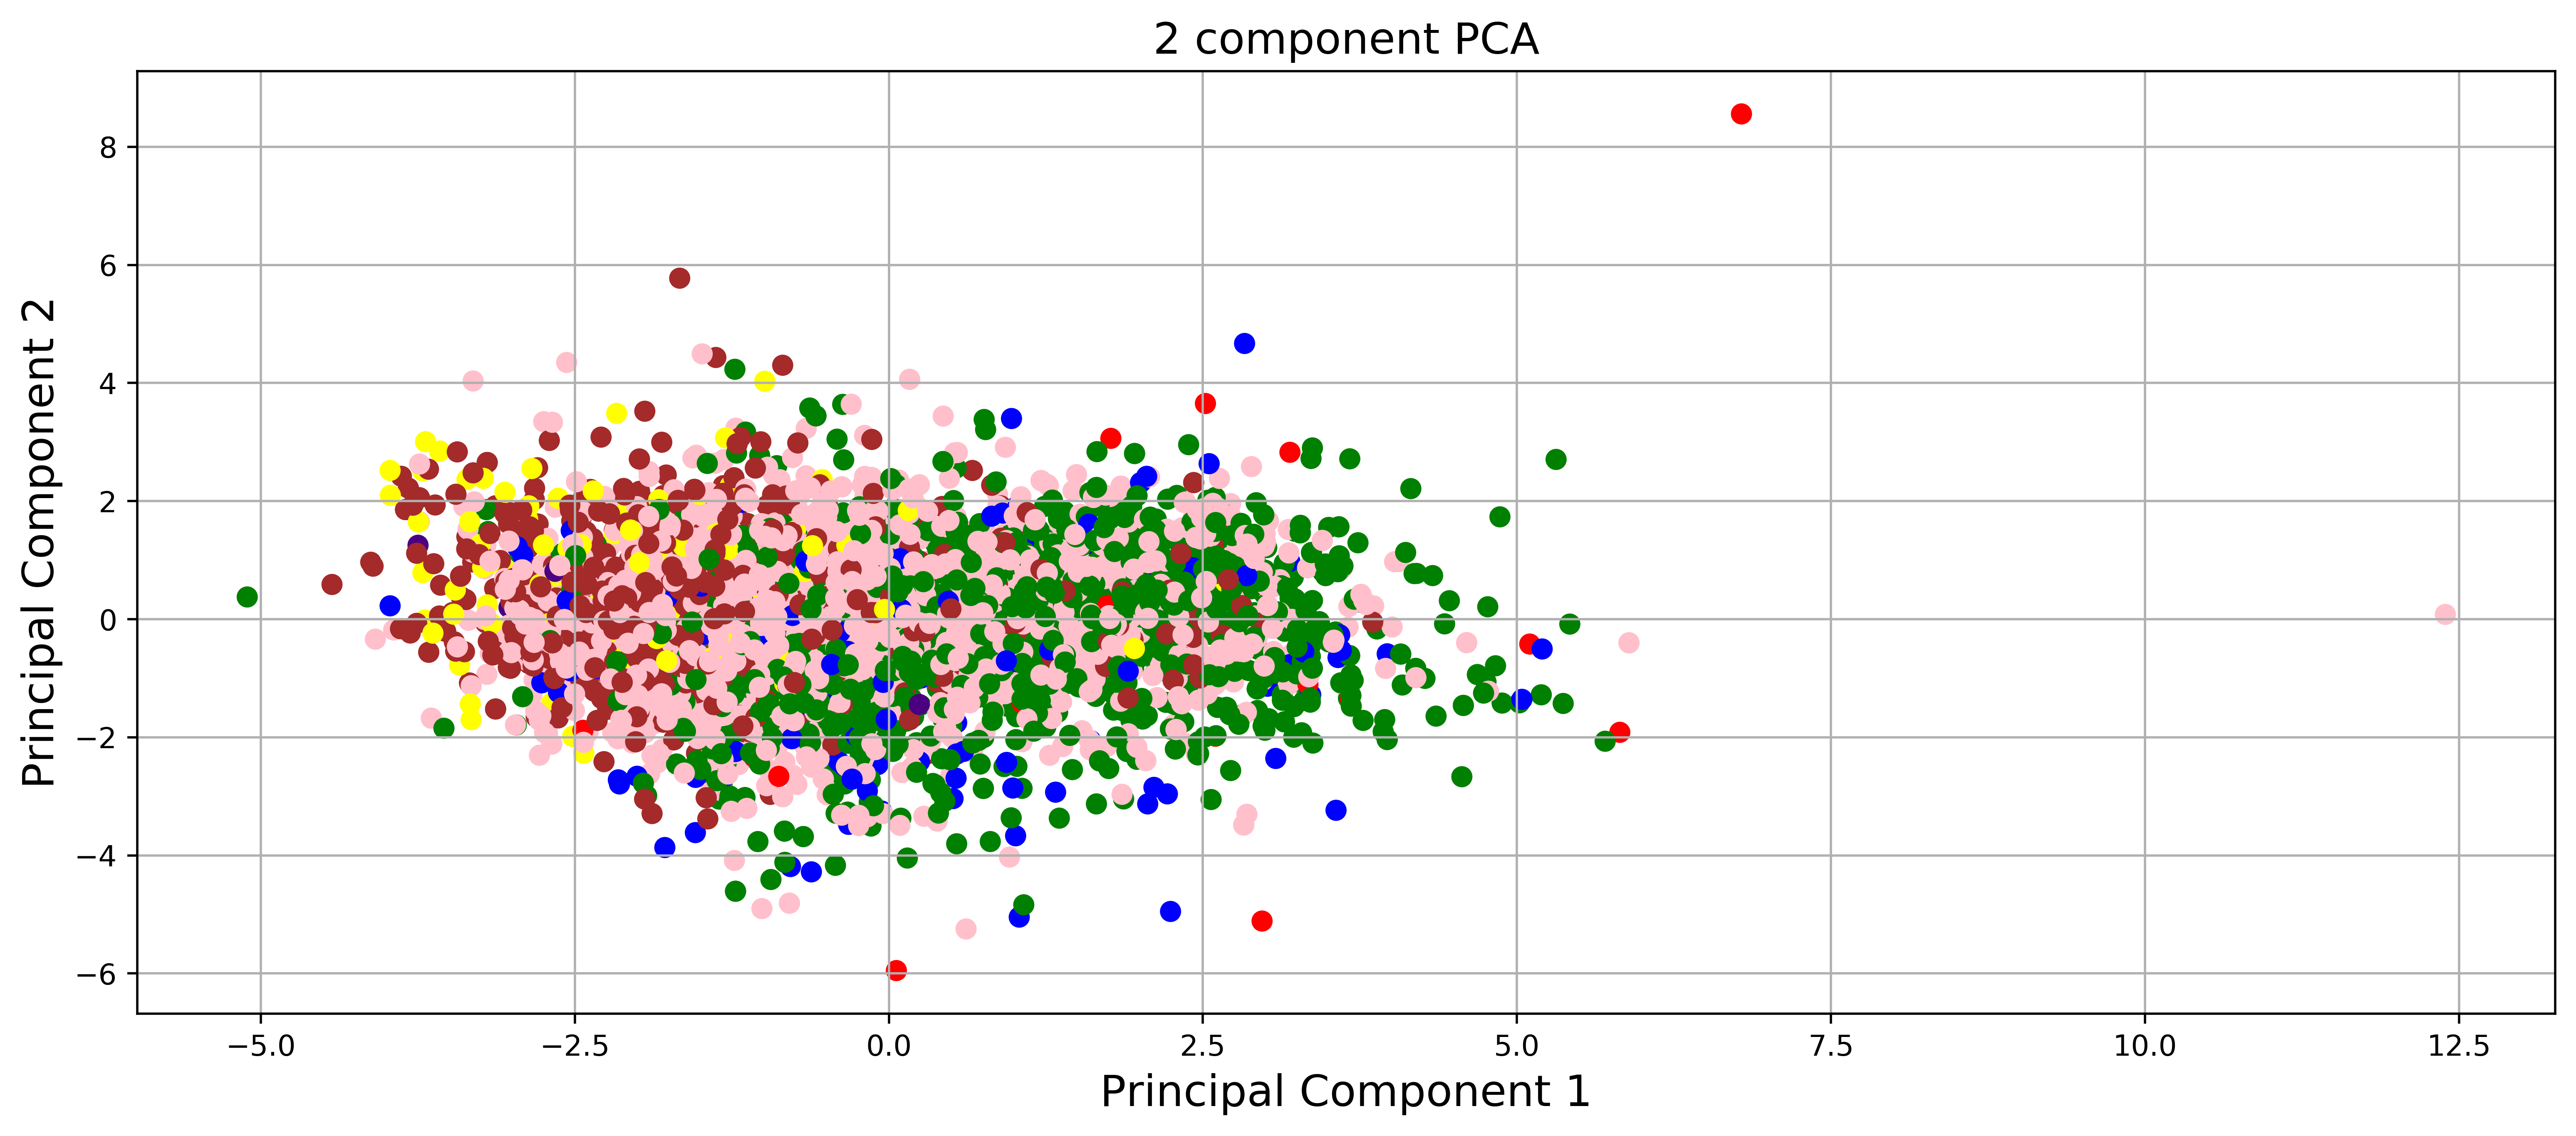

In [7]:
#Task_2_b
df = pd.DataFrame(dict(pc1=proj[:,0], pc2=proj[:,1], color=class_labels))

#Class labels based on quality
colors = {3:'red', 4:'blue', 5:'green', 6:'pink', 7:'brown', 8:'yellow', 9:'indigo'}

plt.figure(figsize=(15,6),dpi=500)

plt.scatter(df['pc1'],df['pc2'],color=df['color'].apply(lambda x: colors[x]),marker='o',s=40)
plt.xlabel('Principal Component 1',fontsize=15)
plt.ylabel('Principal Component 2',fontsize=15)
plt.title('2 component PCA',fontsize=15)
plt.grid()


## Task 2 (c): Report the variance captured by each principal component.

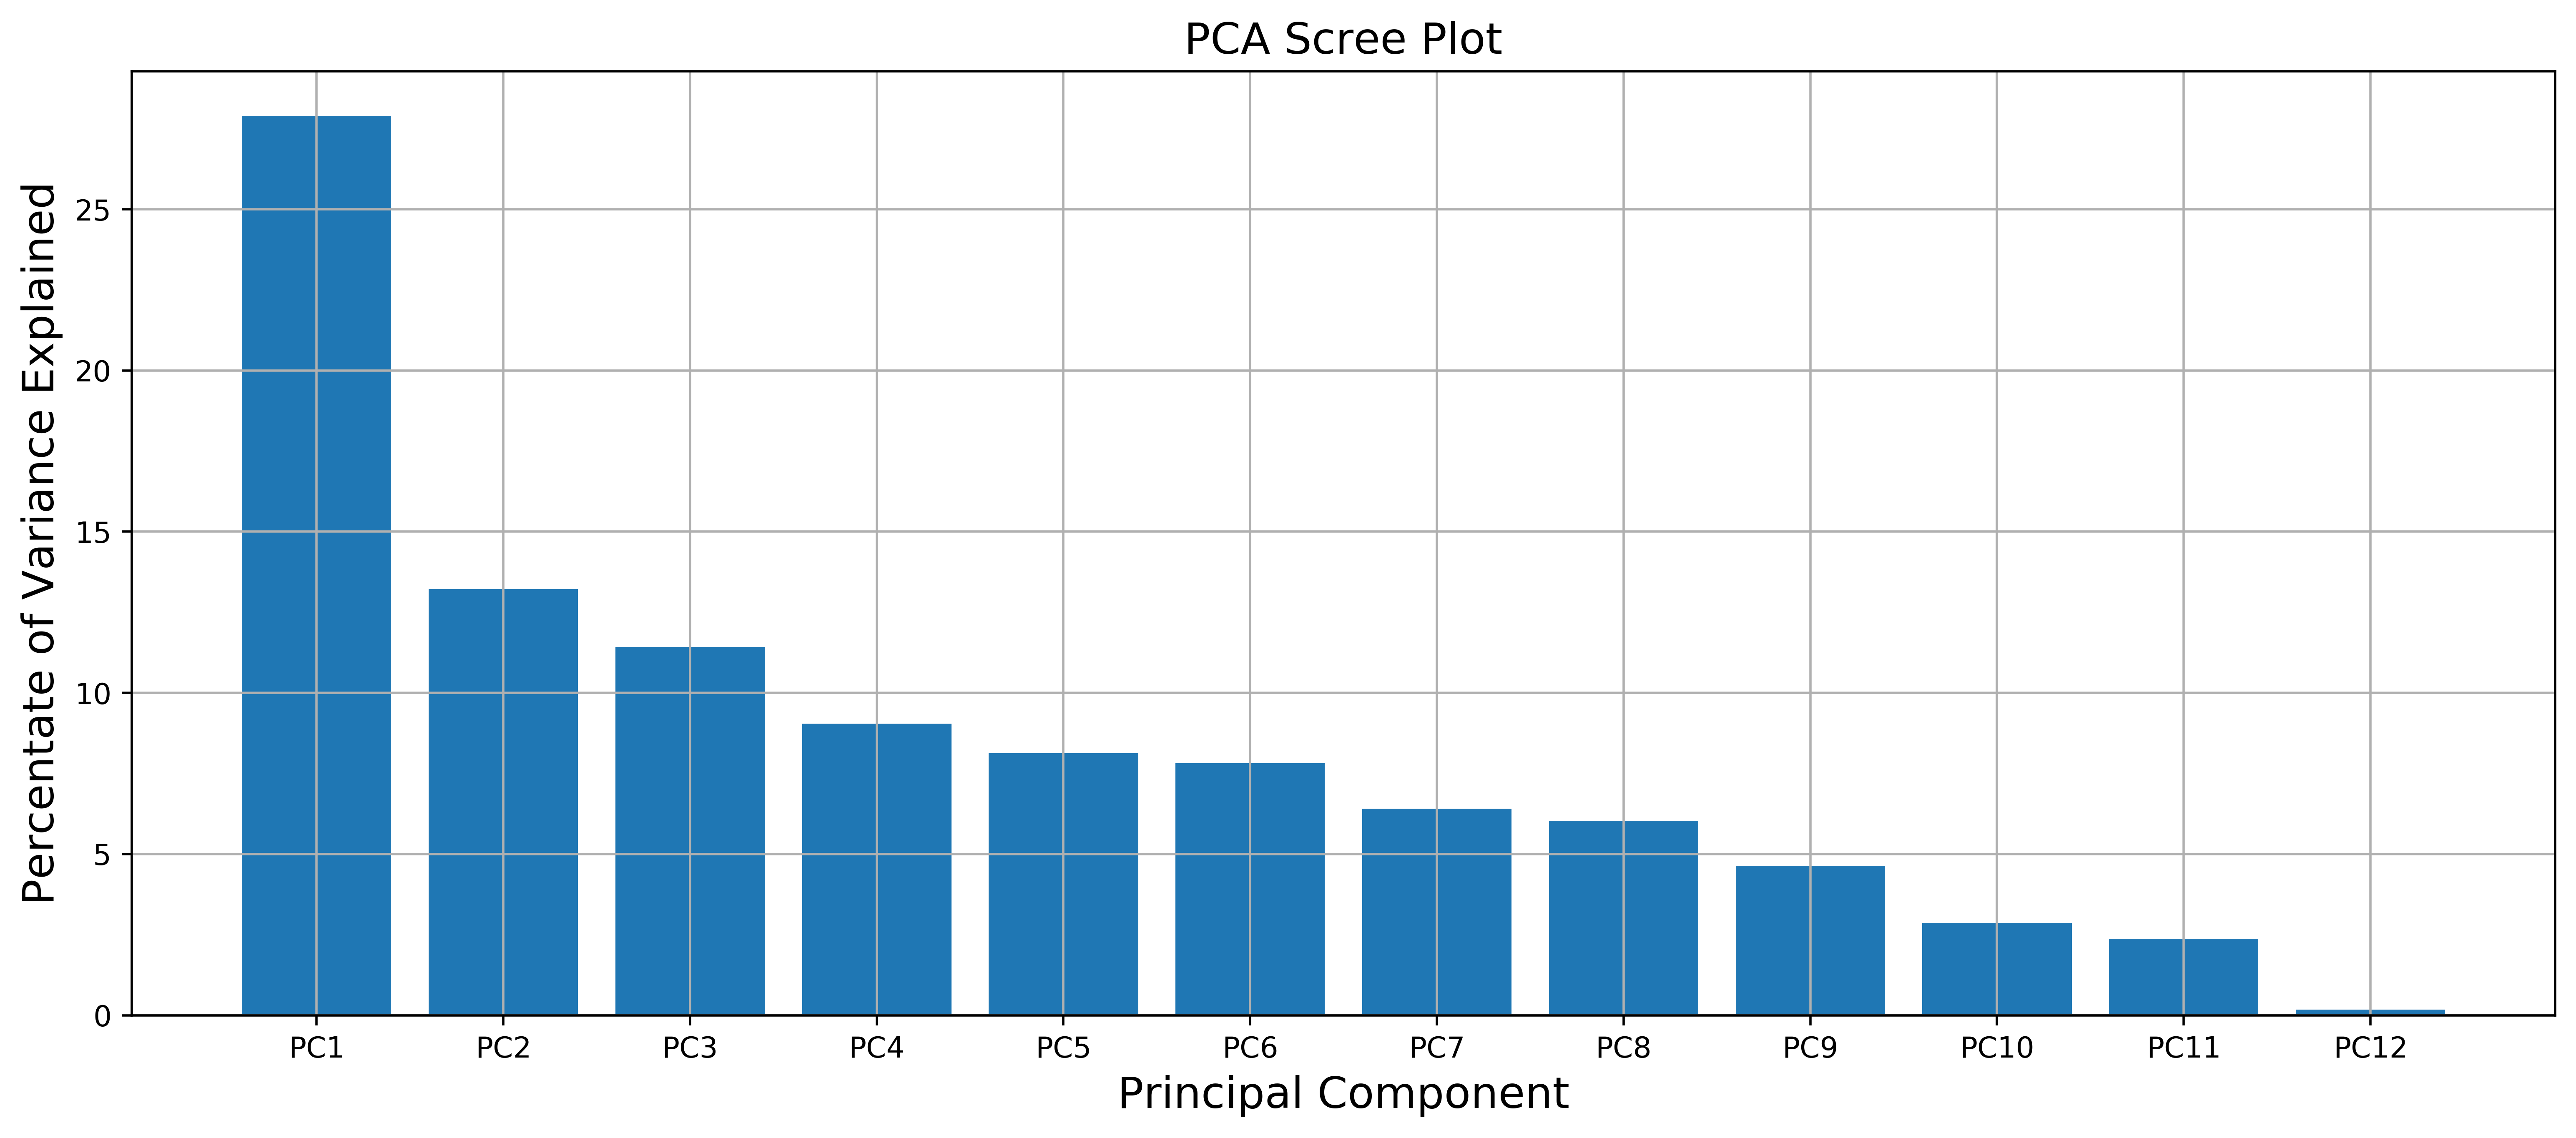

In [8]:
#Task_2_c
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns1 = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
plt.figure(figsize=(15,6),dpi=500)
plt.bar(x= range(1,13), height=percent_variance, tick_label=columns1)
plt.ylabel('Percentate of Variance Explained',fontsize=15)
plt.xlabel('Principal Component',fontsize=15)
plt.title('PCA Scree Plot',fontsize=15)
plt.grid()
plt.show()

## Task 3 (a): Take out the first 1000 rows from white_wine and save it as the validation set.

In [9]:
#Task_3_a
validation_set_x,validation_set_y=white_wine[0:1000,0:11],class_labels[0:1000]
print(validation_set_x,validation_set_y)

[[ 0.76466702  0.01745194  0.6264779  ...  0.60756531 -0.34918426
  -0.17413078]
 [ 1.94980715 -0.47865728 -0.44783612 ... -1.04822629 -0.87497341
  -0.01159456]
 [ 0.40912499 -0.67710097  0.04800112 ...  0.40887032 -0.78734189
   0.63855033]
 ...
 [ 1.23872307  1.40655776  1.28759423 ...  0.67379698  0.96528863
   0.55728222]
 [ 2.4238632  -0.18099175 -0.03463842 ... -0.38590965 -0.26155273
   0.23220977]
 [-1.01304317  1.30733592 -2.34854555 ...  0.14394366  0.61476253
  -1.06808001]] 3732    5
2981    7
1247    6
1835    5
4432    6
       ..
1382    6
3738    6
1554    7
2607    6
811     6
Name: quality, Length: 1000, dtype: int64


## Task 3 (b): Take out the last 1000 rows from white_wine and save it as the test set.

In [10]:
#Task_3_b
test_set_x,test_set_y=white_wine[3898:4898,0:11],class_labels[3898:4898]
print(test_set_x,test_set_y)

[[-3.01959090e-01 -3.79435433e-01 -9.43673362e-01 ... -5.84604641e-01
   1.57870931e+00 -9.05543789e-01]
 [-1.01304317e+00  5.13561164e-01 -6.13115201e-01 ... -2.53446321e-01
  -6.99710361e-01 -1.06808001e+00]
 [-5.38987115e-01  4.14339320e-01 -1.99917499e-01 ... -8.49531297e-01
  -3.49184257e-01  1.04489089e+00]
 ...
 [ 5.35829483e-02  6.12783009e-01 -2.82557040e-01 ...  1.13741862e+00
   1.34184656e-03  1.45123145e+00]
 [-5.38987115e-01  1.00967039e+00 -7.78394281e-01 ... -5.18372977e-01
   9.65288632e-01 -1.06808001e+00]
 [-1.83445077e-01 -1.07398834e+00  7.09117443e-01 ... -9.81994625e-01
  -4.36815783e-01 -1.31188435e+00]] 4395    5
4256    5
3385    6
666     6
251     3
       ..
3335    6
1099    7
2514    7
3606    5
2575    6
Name: quality, Length: 1000, dtype: int64


## Task 3 (c): Save the rest of rows from white_wine as the training set.

In [11]:
#Task_3_c
train_set_x,train_set_y=white_wine[1000:3898,0:11],class_labels[1000:3898]
print(train_set_x,train_set_y)

[[-0.30195909 -1.17321019  0.13064066 ...  0.01148034  2.27976152
   1.53249956]
 [-1.01304317 -1.07398834 -0.36519658 ... -0.31967798 -1.31313104
   1.45123145]
 [ 0.17209696  0.41433932 -0.53047566 ... -0.25344632  0.96528863
   1.69503579]
 ...
 [ 0.40912499  0.51356116 -0.94367336 ... -1.44561627  0.26423642
   1.36996334]
 [ 1.00169505  0.01745194  0.13064066 ...  0.54133365  0.08897337
  -0.74300757]
 [-1.84264125  1.15850315 -2.18326647 ...  2.06466192 -1.22549952
   0.06967355]] 3318    7
2869    6
3603    7
576     6
2220    6
       ..
1039    5
1183    6
3646    7
2140    5
1153    6
Name: quality, Length: 2898, dtype: int64


## Task 4 (a): Produce a learning curve of the size of training set against the performance measurements. The performance should be measured on both the training set and the validation set. You need to choose at least 10 different sizes for the training set. For example, the first size may be 10% of the total training set produced in Task 3.

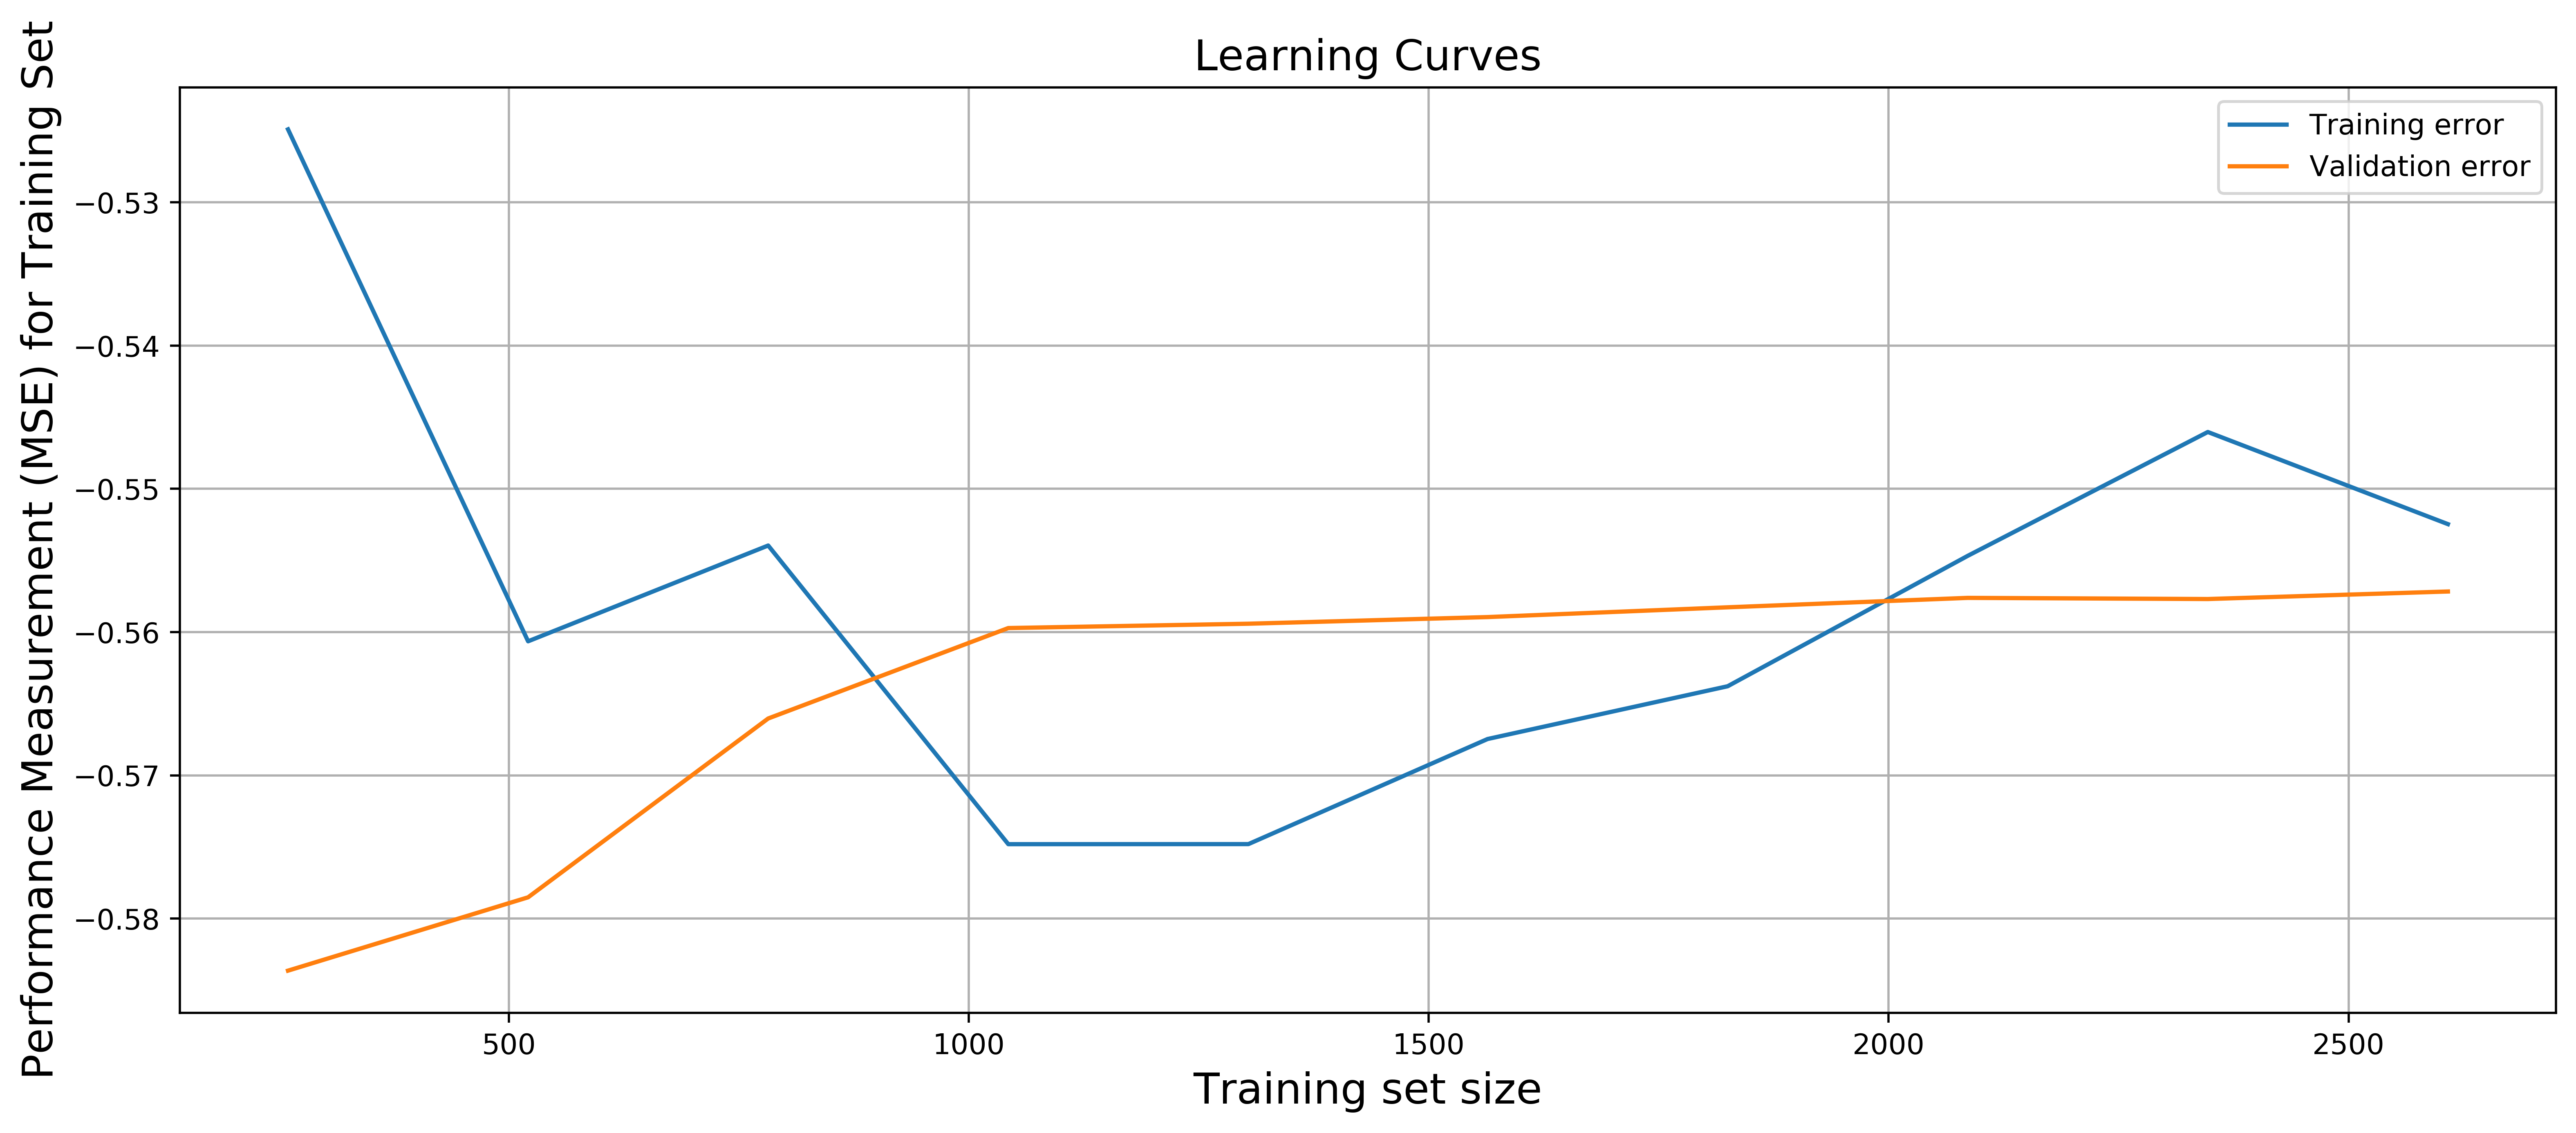

In [35]:
#Task_4_a
#Calling learning curve function with linear regression
train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),X = train_set_x, y= train_set_y,train_sizes = np.linspace(0.1, 1.0, 10),cv = 10, scoring ='neg_mean_squared_error')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

# Plotting the learning curves for training set
plt.figure(figsize=(15,6),dpi=500)
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Performance Measurement (MSE) for Training Set', fontsize = 15)
plt.xlabel('Training set size', fontsize = 15)
plt.title('Learning Curves', fontsize = 15)
plt.grid()
plt.legend()

## Task 4 (b): Report what the best training data size you would like to use for this work is and explain why you choose it.

In [40]:
#Task_4_b
print("Best Training Size is: ", train_sizes[9])
print("Reason:\nMaximum size of training set increasing learning of the model and making the performance measurement (MSE) stable.")

Best Training Size is:  2608
Reason:
Maximum size of training set increasing learning of the model and making the performance measurement (MSE) stable.


## Task 4 (c): Report the performance on the test set obtained using the model trained from the best size.

In [50]:
#Task_4_c
reg = LinearRegression()
reg.fit(train_set_x[0:train_sizes[9],0:11], train_set_y[0:train_sizes[9]])
predicted_test_set_y = reg.predict(test_set_x)
print('Performance (MSE) on the test set using the model trained from the best size= ', mean_squared_error(test_set_y,predicted_test_set_y))

Performance (MSE) on the test set using the model trained from the best size=  0.5846687237744961


## Task 5 (a): Summarize your findings for each task.

In [57]:
print('Task 1: Data pre-processing is a very crucial part for data analysis. Without proper pre-processing there may be chance of ambiguous outcomes.\n')
print('Task 2: PCA is very important for complex calculation like it\'s reducting the dimension to make the operation faster and efficient. By using the necessary principal components using scree plot we can perform the operation very easily.\n')
print('Task 3: Dividing dataset for any machine learning algorithm is the first step after completing the pre-processing.\n')
print('Task 4: Linear regression can be used for predicting continuous data. It perform better if the model fit properly. Reducing the MSE is the best way to get good level of prediction.')

Task 1: Data pre-processing is a very crucial part for data analysis. Without proper pre-processing there may be chance of ambiguous outcomes.

Task 2: PCA is very important for complex calculation like it's reducting the dimension to make the operation faster and efficient. By using the necessary principal components using scree plot we can perform the operation very easily.

Task 3: Dividing dataset for any machine learning algorithm is the first step after completing the pre-processing.

Task 4: Linear regression can be used for predicting continuous data. It perform better if the model fit properly. Reducing the MSE is the best way to get good level of prediction.


## Task 5 (b): For Task 4, discuss whether there is any problem with that experimental design. If there is, what is it? How may you further improve it so that the experimental results are more reliable?

In [59]:
print('In my opinion, I think the validation set should be the part of the training set in the case of linear model. Because it is used to build the model and for parameter selection and to avoild overfitting. So separate set not required for linear model. The experimental results can be improved by merging training set and validation set together.')

In my opinion, I think the validation set should be the part of the training set in the case of linear model. Because it is used to build the model and for parameter selection and to avoild overfitting. So separate set not required for linear model. The experimental results can be improved by merging training set and validation set together.
